<a href="https://colab.research.google.com/github/dwishashah/Insurance-Claim-Prediction---ML/blob/main/ML_MiniProject_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING DATASET

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/insurance2.csv')

In [ ]:
df.head(15)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,0
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
9,60,0,25.840,0,0,1,28923.13692,0


In [ ]:
df.shape

(1338, 8)

In [ ]:
#Checking the dtypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [ ]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [ ]:
#Checking number of unique rows in each feature
df.nunique().sort_values()

sex                  2
smoker               2
insuranceclaim       2
region               4
children             6
age                 47
bmi                548
charges           1337
dtype: int64

In [ ]:
#Checking the stats of all the columns
display(df.describe())

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS (EDA)

1.  age : age of policyholder
2.  sex: gender of policy holder (female=0, male=1)
3.  bmi: Body mass index, ideally 18.5 to 25
4.  children: number of children / dependents of policyholder
5.  smoker: smoking state of policyholder (non-smoke=0;smoker=1)
6.  region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)
7.  charges: individual medical costs billed by health insurance
8.  insurance claim: yes=1, no=0

In [ ]:
target = 'insuranceclaim'
labels = ['Claimed','Not Claimed']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)


Visualising the target variable

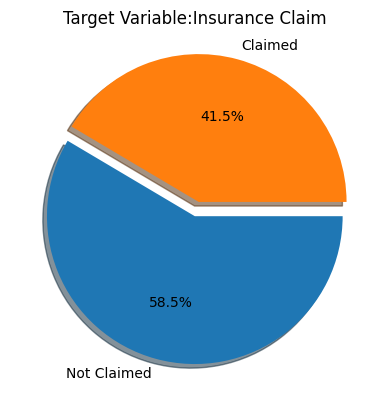

Claimed:
783
Not Claimed:
555


In [ ]:
MAP={}
for e, i in enumerate(sorted(df[target].unique())):
    MAP[i]=labels[e]

df1 = df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
plt.title(label = "Target Variable:Insurance Claim", fontweight="15")
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()
print("Claimed:")
print(df['insuranceclaim'].value_counts()[1])
print("Not Claimed:")
print(df['insuranceclaim'].value_counts()[0])

<Axes: >

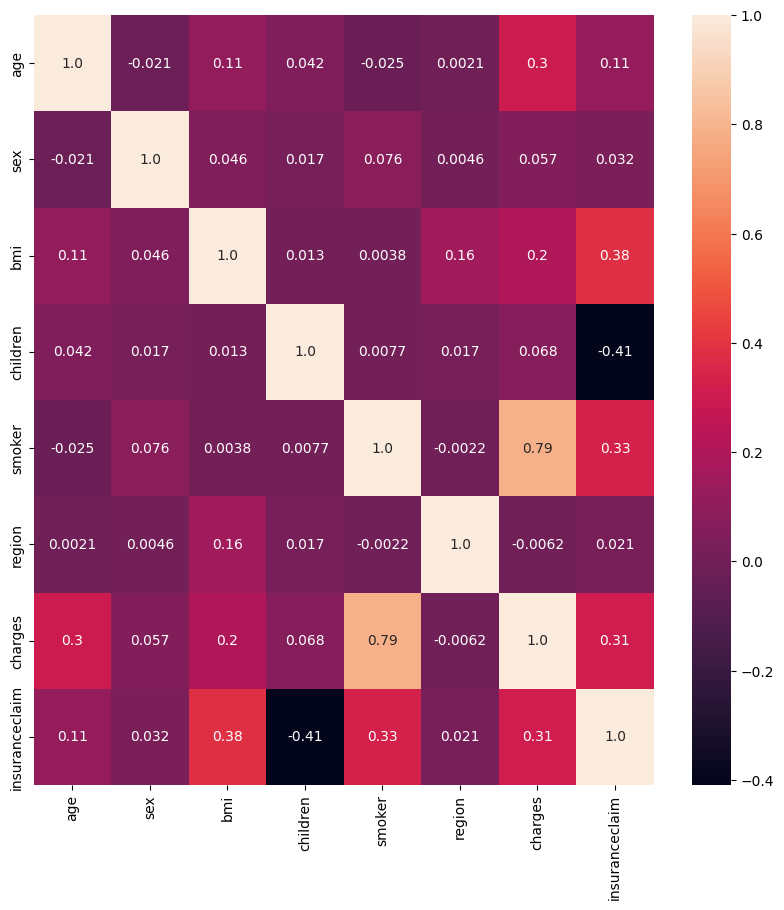

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".2")

The above heatmap shows that the relation between insurance claim is high with the following attributes:


1.   BMI - 0.38
2.   Smoker - 0.33
3.   Charges - 0.31



Visualising the categorical features 

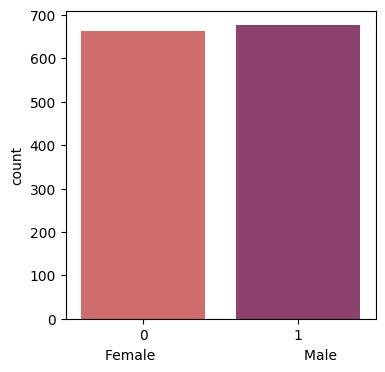

Males:
676
Females:
662


In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x ='sex',data = df, palette = "flare")
plt.xlabel("Female                                  Male")
plt.show()
print("Males:")
print(df['sex'].value_counts()[1])
print("Females:")
print(df['sex'].value_counts()[0])

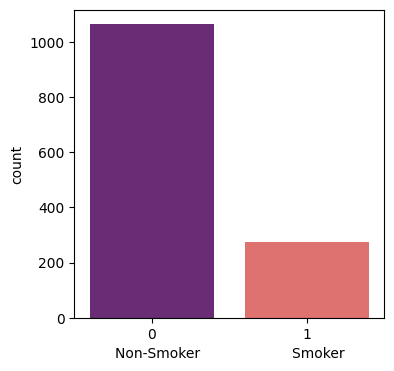

Smoker:
274
Non-Smoker:
1064


In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x ='smoker',data = df,palette = "magma")
plt.xlabel("Non-Smoker                     Smoker")
plt.show()
print("Smoker:")
print(df['smoker'].value_counts()[1])
print("Non-Smoker:")
print(df['smoker'].value_counts()[0])

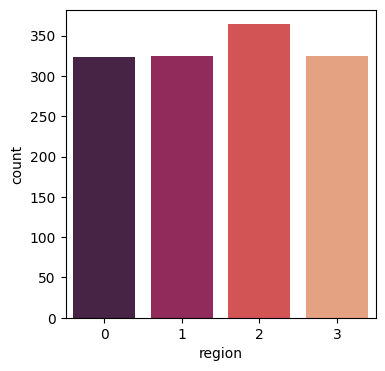

Northeast:
324
Northwest:
325
Southeast:
364
Southwest:
325


In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x ='region',data = df,palette = "rocket")
plt.show()
print("Northeast:")
print(df['region'].value_counts()[0])
print("Northwest:")
print(df['region'].value_counts()[1])
print("Southeast:")
print(df['region'].value_counts()[2])
print("Southwest:")
print(df['region'].value_counts()[3])

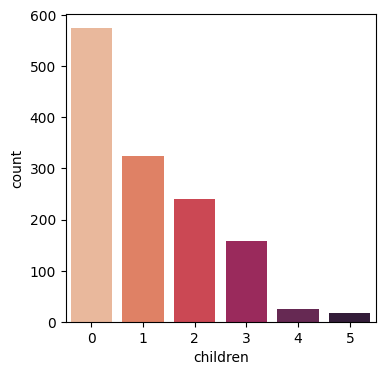

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x ='children',data = df,palette = "rocket_r")
plt.show()

Inference: Visualizing the categorical features reveal lot of information about the dataset.

Understanding the relationship between all the features

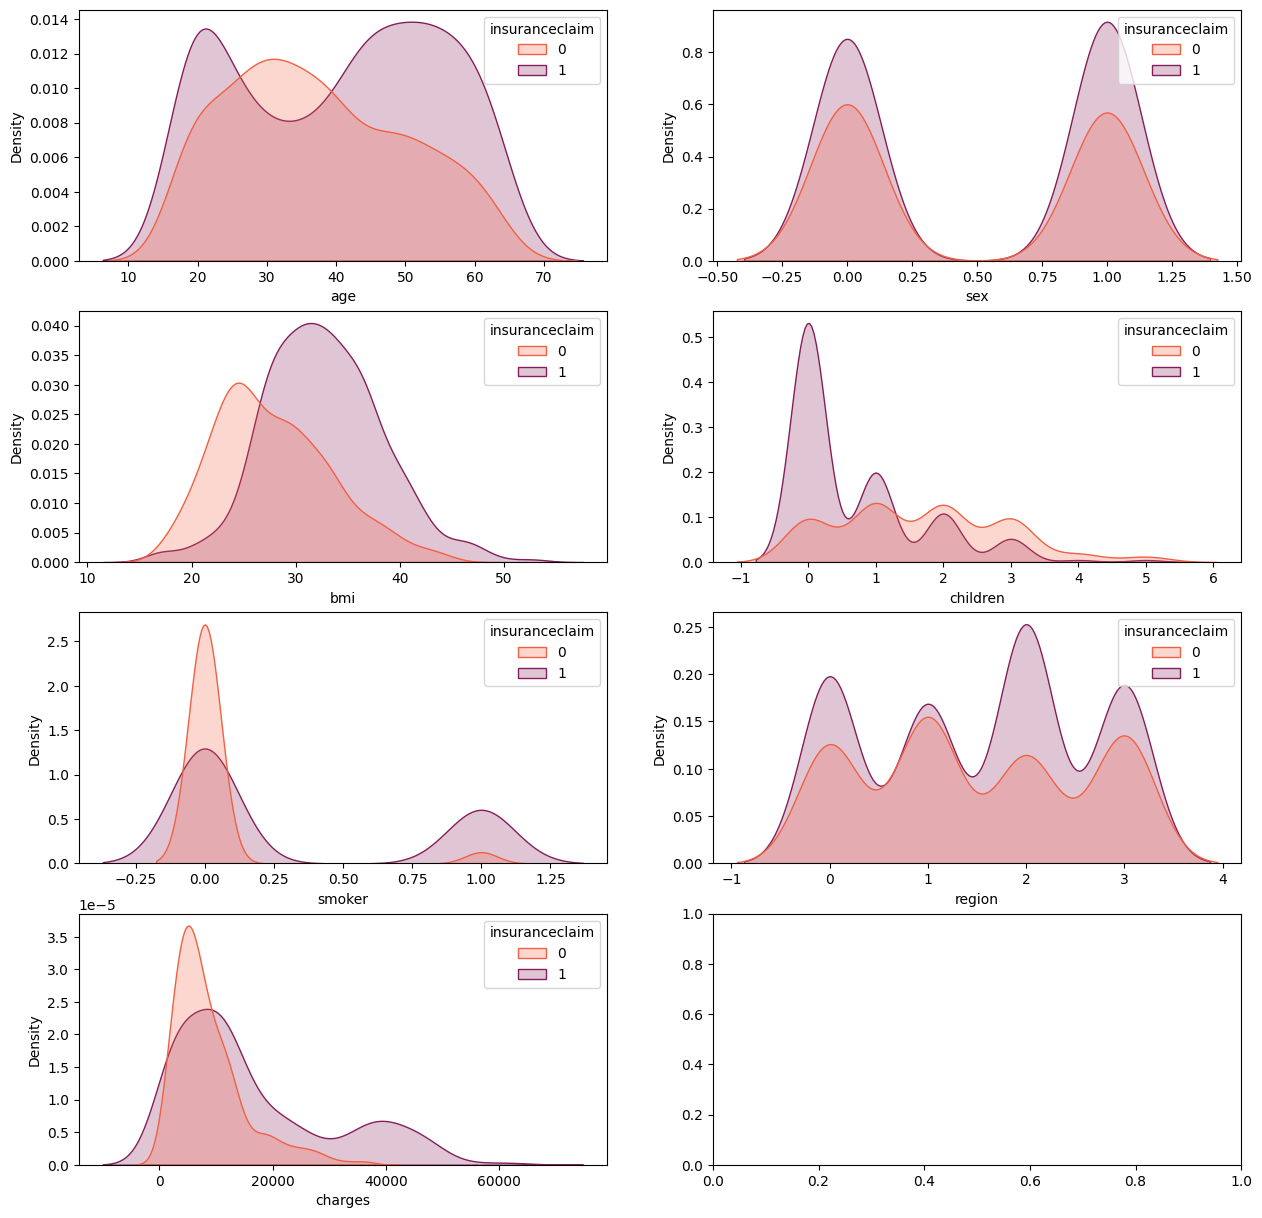

In [ ]:
feat_cols = df.drop(["insuranceclaim"], axis=1).columns
fig, axes = plt.subplots(4, 2, figsize=(15,15))
for i in range(len(feat_cols)):
    ax = axes[int(i/2), i%2]
    sns.kdeplot(data=df, x=feat_cols[i], hue="insuranceclaim", fill=True, palette="rocket_r", ax=ax)

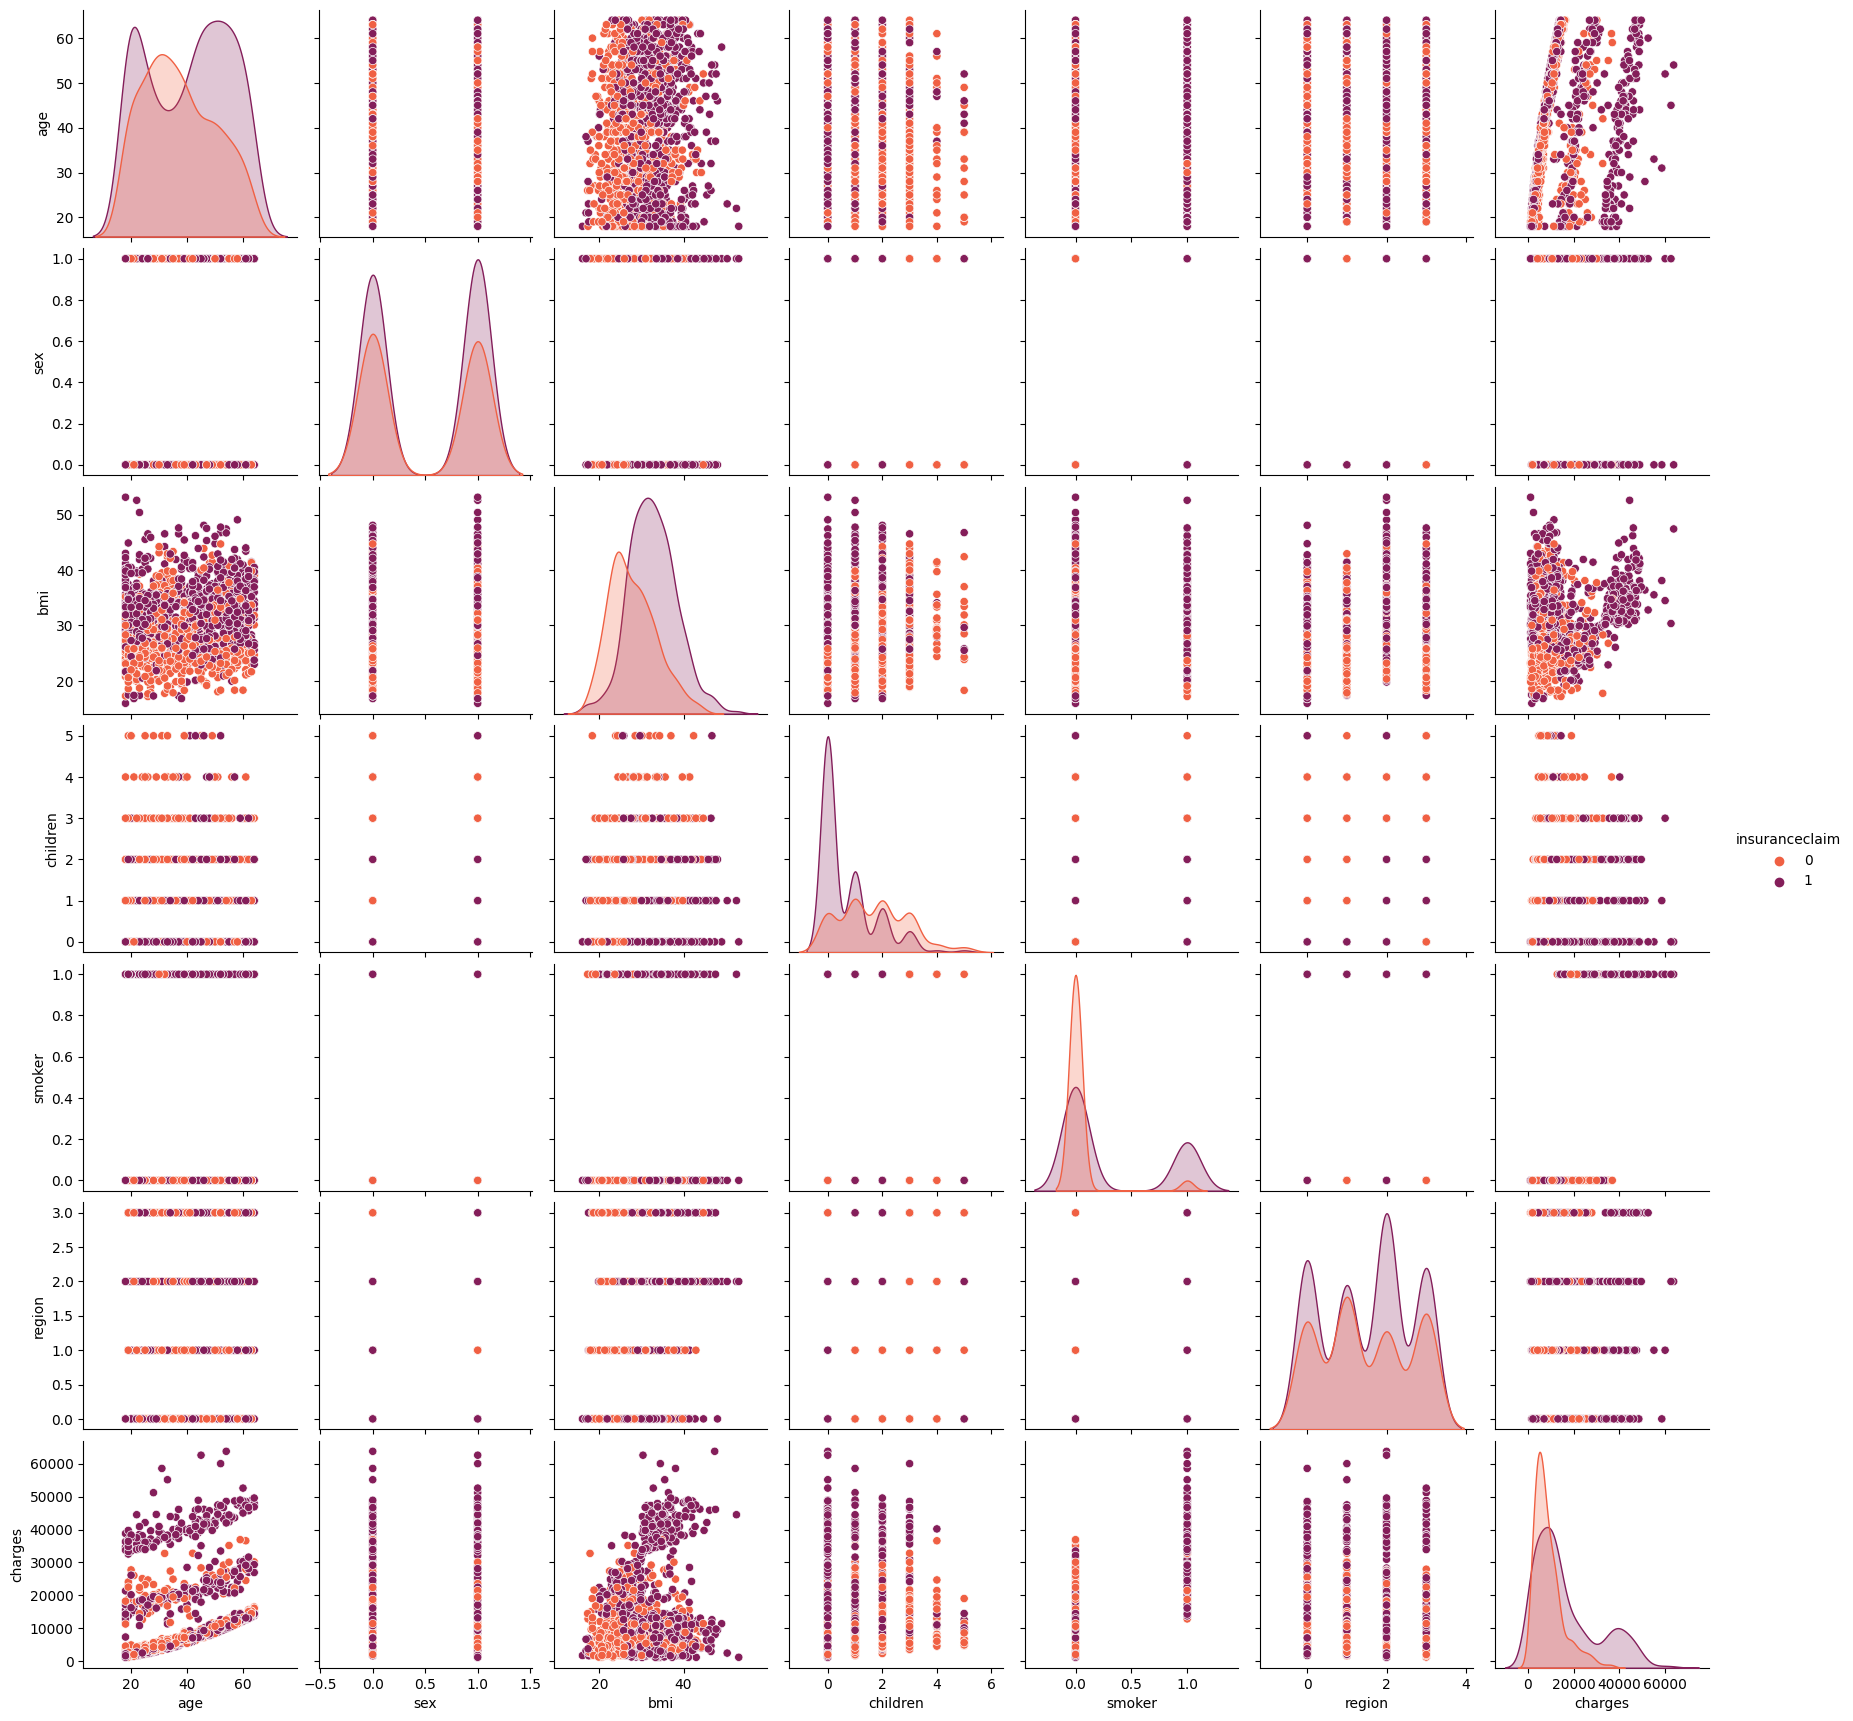

In [ ]:
g = sns.pairplot(df, hue = 'insuranceclaim',palette="rocket_r")

# TASK 3: MODEL BUILDING

1. DECISION TREE

In [ ]:
x=df[["age","sex","bmi","children","smoker","region","charges"]]
y=df['insuranceclaim']

Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(1070, 7)
(268, 7)


Importing Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_test_pred=classifier.predict(x_test)

In [ ]:
y_train_pred=classifier.predict(x_train)


In [ ]:
result=pd.DataFrame()
result["actual_y"]=y_test
result['predicted_y']=y_test_pred
print(result.sample(5))

      actual_y  predicted_y
899          0            0
370          0            0
1251         0            0
1104         1            1
256          1            1


Accuracy of Test Data

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
print("Accuracy score of test is ",accuracy_score(y_test,y_test_pred)*100)
print("Accuracy score of train is ",accuracy_score(y_train,y_train_pred))
cm=pd.DataFrame(confusion_matrix(y_test,y_test_pred),columns=list(range(0,2)))
print(cm)

Accuracy score of test is  97.01492537313433
Accuracy score of train is  1.0
     0    1
0  105    1
1    7  155


Precision, Recall, F1 Score

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
print("precision score is ",precision_score(y_test,y_test_pred,average=None))
print("recall score is ",recall_score(y_test,y_test_pred,average=None))
print("f1 score is ",f1_score(y_test,y_test_pred,average=None))

precision score is  [0.9375     0.99358974]
recall score is  [0.99056604 0.95679012]
f1 score is  [0.96330275 0.97484277]


Classification Report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print("classification report is ")
print(classification_report(y_test,y_test_pred))

classification report is 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       106
           1       0.99      0.96      0.97       162

    accuracy                           0.97       268
   macro avg       0.97      0.97      0.97       268
weighted avg       0.97      0.97      0.97       268



Plotting the Tree

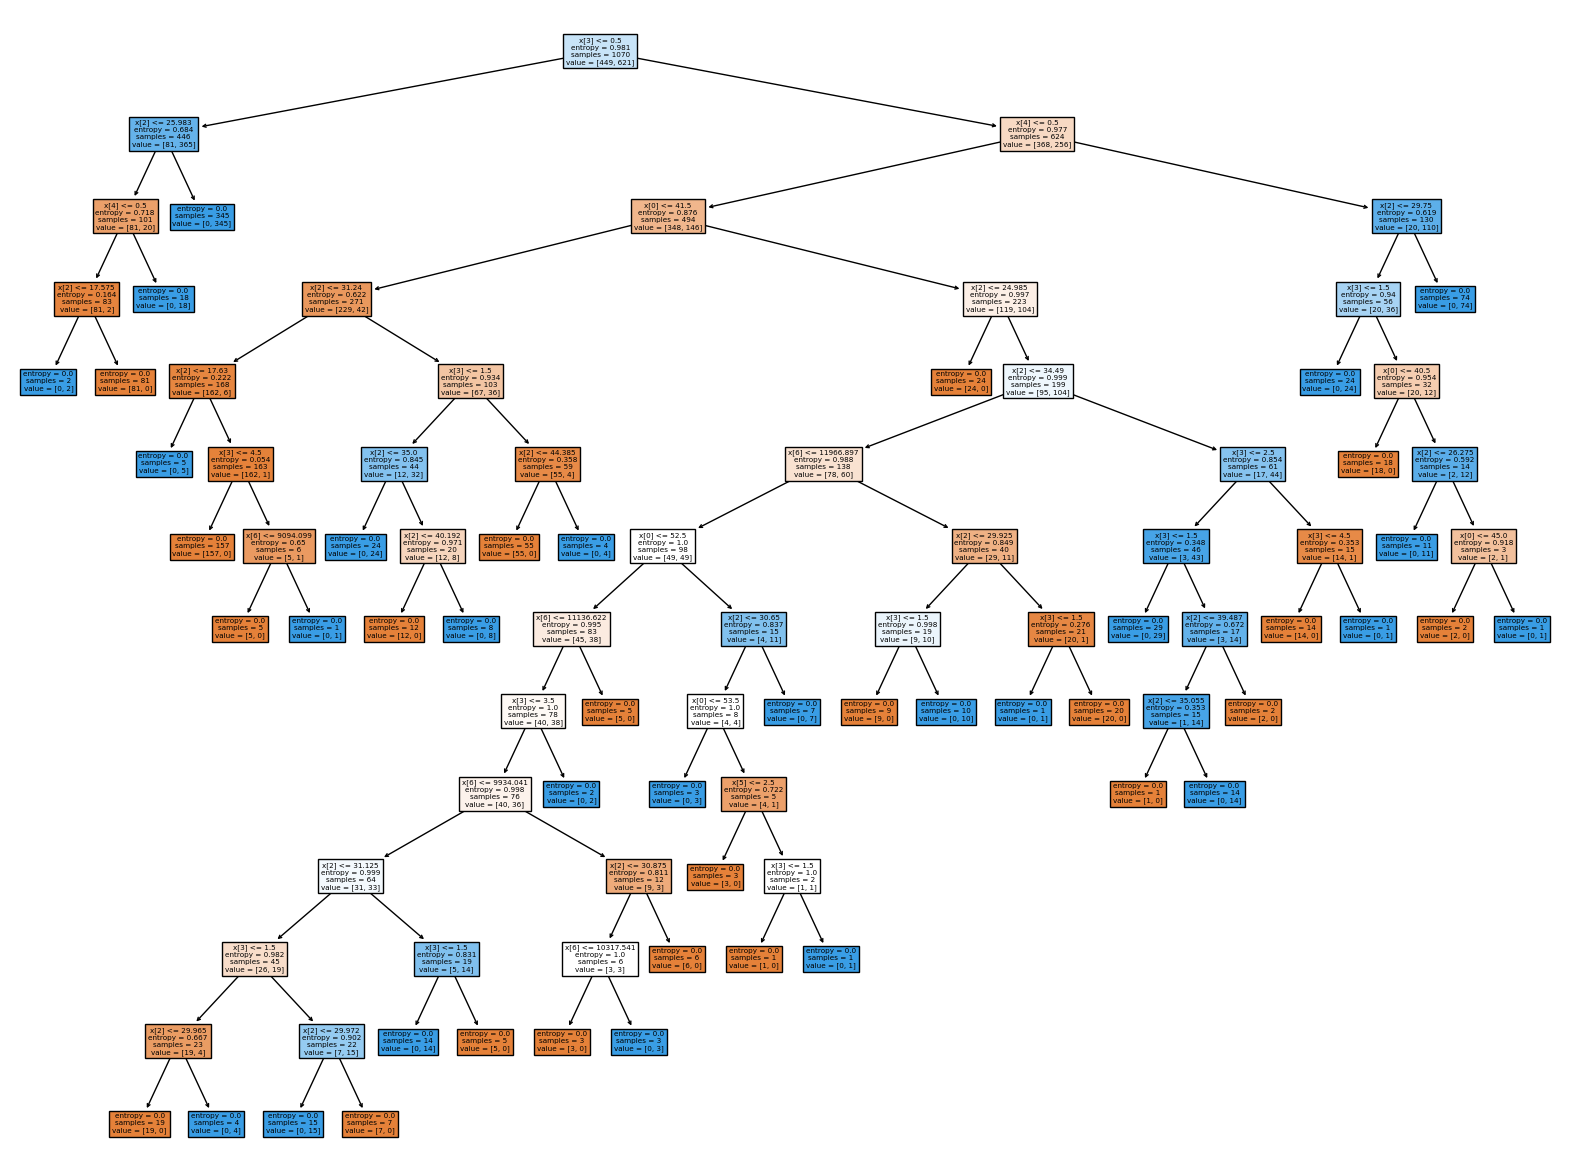

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(classifier,filled=True)
plt.show()

Max-depth

In [ ]:
max_depth = classifier.tree_.max_depth
max_depth

13

In [ ]:
for i in range(max_depth):

  dtc =DecisionTreeClassifier(max_depth=i+1)
  dtc.fit(x_train,y_train)

  train_z = dtc.predict(x_train)
  train_z_prob = dtc.predict_proba(x_train)[:,1]

  test_z = dtc.predict(x_test)
  test_z_prob = dtc.predict_proba(x_test)[:,1]

  a=accuracy_score(y_test, test_z)
  print(f"model accuracy at depth {i+1} is :{a*100}")

model accuracy at depth 1 is :64.92537313432835
model accuracy at depth 2 is :80.59701492537313
model accuracy at depth 3 is :83.2089552238806
model accuracy at depth 4 is :89.92537313432835
model accuracy at depth 5 is :90.29850746268657
model accuracy at depth 6 is :92.53731343283582
model accuracy at depth 7 is :95.52238805970148
model accuracy at depth 8 is :94.77611940298507
model accuracy at depth 9 is :94.40298507462687
model accuracy at depth 10 is :95.8955223880597
model accuracy at depth 11 is :95.1492537313433
model accuracy at depth 12 is :95.52238805970148
model accuracy at depth 13 is :95.1492537313433


Graph between Train and Test Scores

1, train: 0.685, test: 0.649
2, train: 0.826, test: 0.806
3, train: 0.844, test: 0.832
4, train: 0.867, test: 0.899
5, train: 0.909, test: 0.903
6, train: 0.930, test: 0.922
7, train: 0.949, test: 0.951
8, train: 0.959, test: 0.948
9, train: 0.966, test: 0.944
10, train: 0.970, test: 0.951
11, train: 0.975, test: 0.955
12, train: 0.977, test: 0.944
13, train: 0.979, test: 0.951


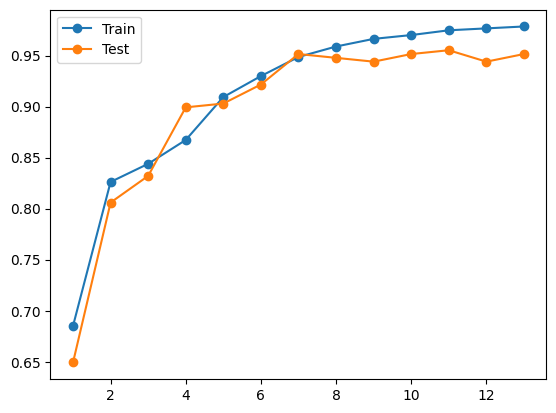

In [ ]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 14)]

for i in values:

 model = DecisionTreeClassifier(max_depth=i)

 model.fit(x_train, y_train)

 train_yhat = model.predict(x_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 
 test_yhat = model.predict(x_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)

 print('%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

At Max Depth 3

In [ ]:
import sklearn.metrics as metrics

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8283582089552238


Plotting Final Tree

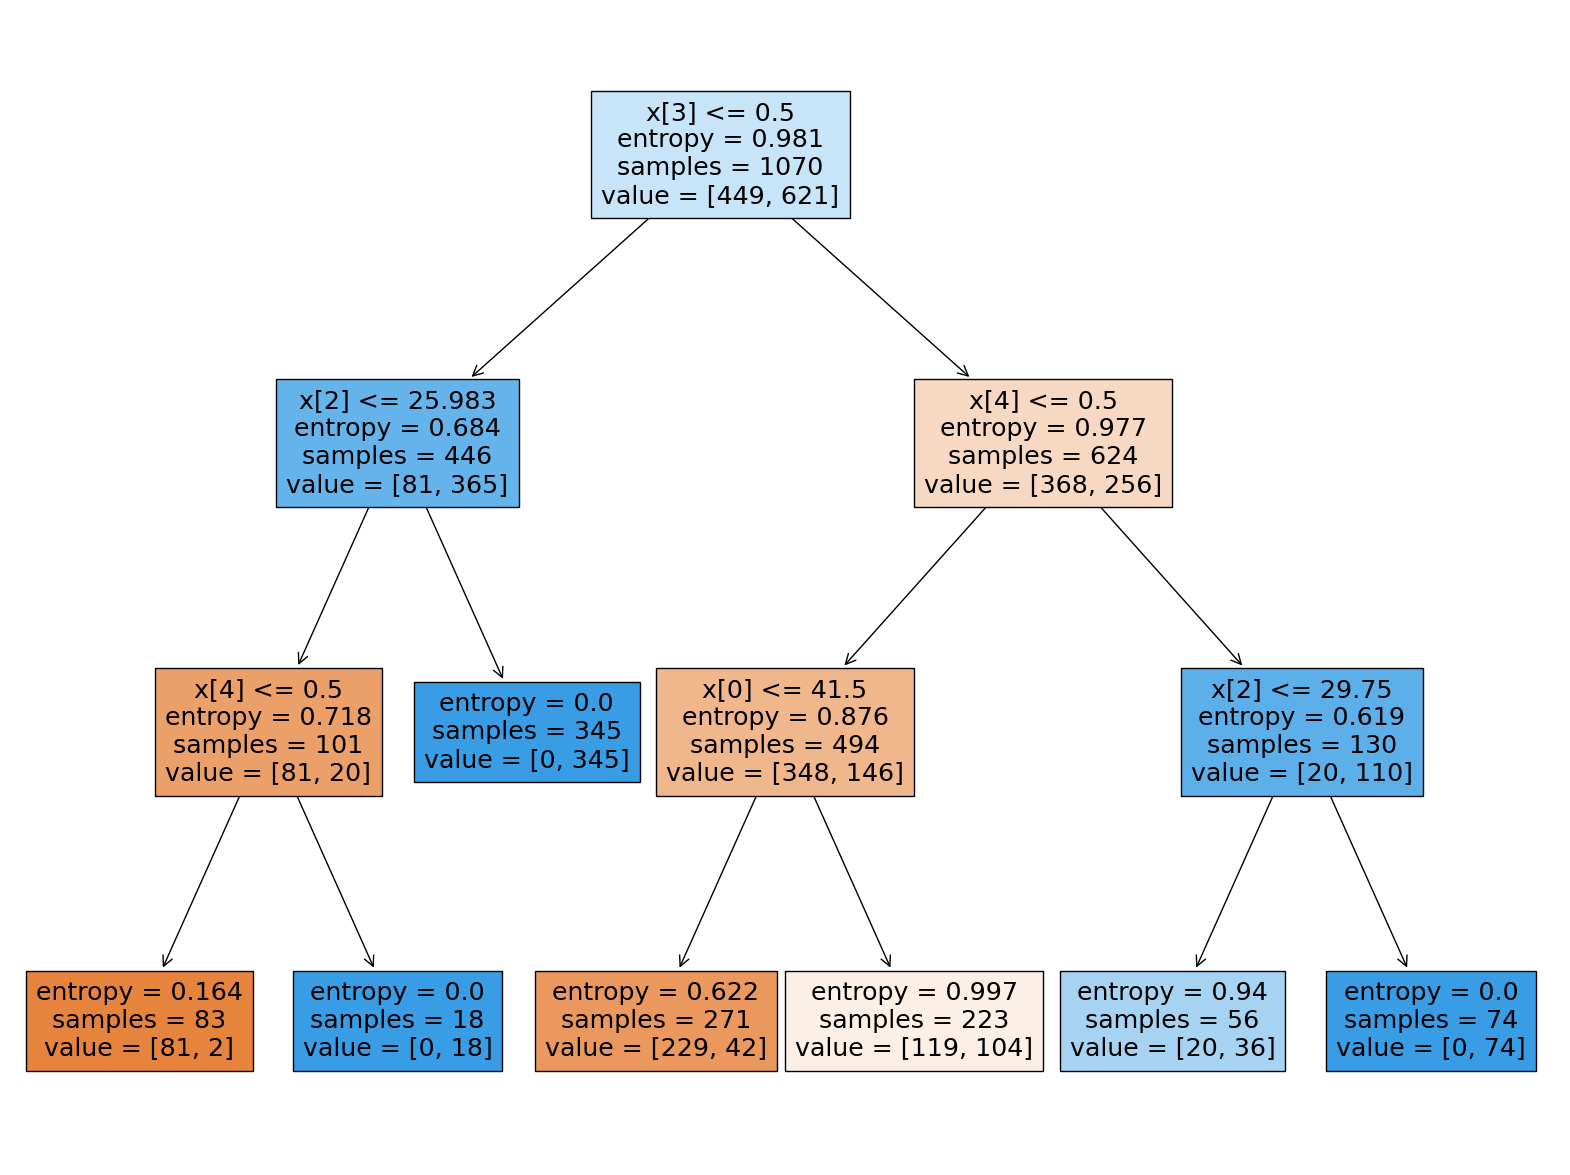

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(clf,filled=True)
plt.show()

At Max Depth 7

In [ ]:
import sklearn.metrics as metrics

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=7)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9477611940298507


Plotting Final Tree

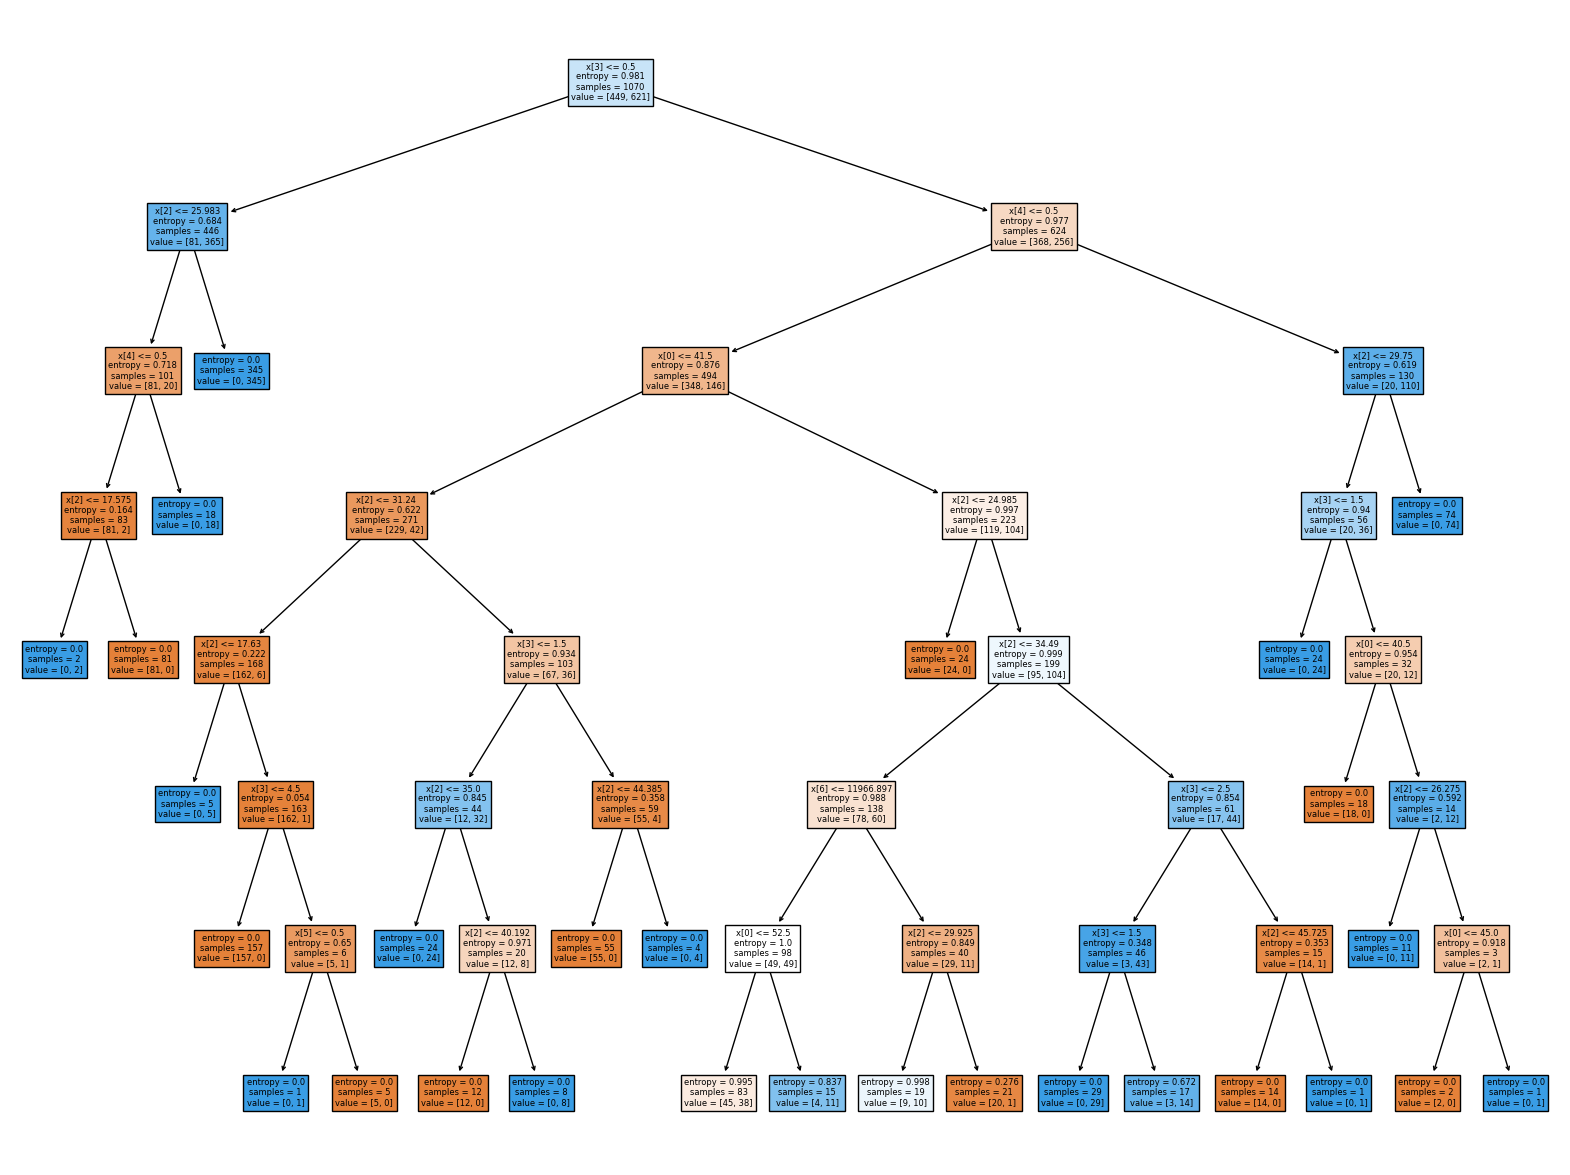

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(clf,filled=True)
plt.show()

2. LOGISTIC REGRESSION

In [ ]:
x2=df[["age","sex","bmi","children","smoker","region","charges"]]
y2=df['insuranceclaim']

In [ ]:
from sklearn.model_selection import train_test_split 
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=2)

In [ ]:
# testing dataset
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(x2_train,y2_train)

y_log=l1.predict(x2_test)

from sklearn.metrics import accuracy_score
ac=accuracy_score(y_log,y2_test)*100
ac

86.94029850746269

In [ ]:
# Training dataset
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(x2_train,y2_train)

y_log_train=l1.predict(x2_train)

from sklearn.metrics import accuracy_score
ac=accuracy_score(y_log_train,y2_train)*100
ac

85.23364485981308